In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Preprocessing and Analysis

In [30]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [31]:
# For data preprocessing and analysis part
data = pd.read_csv('./data_preprocess_v2/aapl.us.csv')
# Any CSV or TXT file can be added here....
data.dropna(inplace=True)
data = data[data["Date"]>='2005-01-01']
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
5125,2005-01-03,4.1529,4.1685,4.0083,4.0519,193279926,0
5126,2005-01-04,4.0825,4.1915,4.0314,4.0940,306165093,0
5127,2005-01-05,4.0940,4.1775,4.0940,4.1300,189804833,0
5128,2005-01-06,4.1491,4.1556,4.0545,4.1324,196766476,0
5129,2005-01-07,4.1646,4.4578,4.1469,4.4336,623374174,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 5125 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3239 non-null   object 
 1   Open     3239 non-null   float64
 2   High     3239 non-null   float64
 3   Low      3239 non-null   float64
 4   Close    3239 non-null   float64
 5   Volume   3239 non-null   int64  
 6   OpenInt  3239 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 202.4+ KB


In [33]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3239.000000,3239.000000,3239.000000,3239.000000,3.239000e+03,3239.0
mean,55.495604,55.999860,54.942818,55.486652,1.500560e+08,0.0
std,43.379806,43.675163,43.073039,43.389196,1.163292e+08,0.0
min,4.082500,4.155600,4.008300,4.051900,0.000000e+00,0.0
25%,16.202000,16.531500,15.835500,16.200500,6.267406e+07,0.0
50%,45.114000,45.380000,44.618000,45.046000,1.231571e+08,0.0
75%,90.952500,91.724500,90.002000,90.979500,2.042118e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,9.396953e+08,0.0


In [34]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [35]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-01-03,4.1529,4.1685,4.0083,4.0519,193279926,0
1,2005-01-04,4.0825,4.1915,4.0314,4.0940,306165093,0
2,2005-01-05,4.0940,4.1775,4.0940,4.1300,189804833,0
3,2005-01-06,4.1491,4.1556,4.0545,4.1324,196766476,0
4,2005-01-07,4.1646,4.4578,4.1469,4.4336,623374174,0


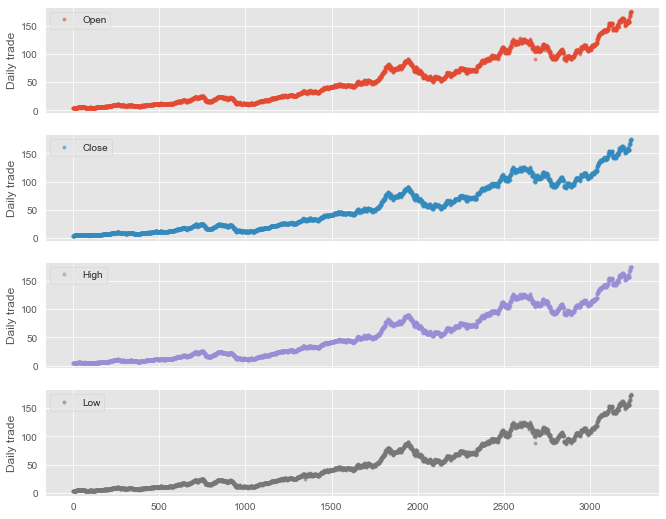

In [36]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Open      High       Low     Close     Volume  OpenInt
0       4.1529    4.1685    4.0083    4.0519  193279926        0
1       4.0825    4.1915    4.0314    4.0940  306165093        0
2       4.0940    4.1775    4.0940    4.1300  189804833        0
3       4.1491    4.1556    4.0545    4.1324  196766476        0
4       4.1646    4.4578    4.1469    4.4336  623374174        0
...        ...       ...       ...       ...        ...      ...
3234  171.7500  174.3600  171.1000  173.6300   34901241        0
3235  173.2900  174.5100  173.2900  174.1800   24424877        0
3236  174.0300  175.6100  173.7100  175.6100   24451166        0
3237  174.4800  175.4600  172.5200  175.2500   29533086        0
3238  175.1100  175.3800  174.2700  174.6700   25130494        0

[3239 rows x 6 columns]


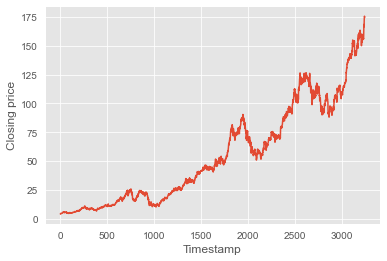

In [37]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

df = data.drop('Date', axis=1)
print(df)

In [45]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=10
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,3]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 3] - first) / first)
    # for j in range(week):
    temp2.append((df.iloc[i + window_size, 3] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(10, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,10,1)
test_X = test_X.reshape(test_X.shape[0],1,10,1)

## Training part

In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy

model = tf.keras.Sequential()

# Creating the Neural Network model here...
model.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu', input_shape=(None, 50, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
model.add(Dense(5, kernel_regularizer=L1(0.01)))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(200, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=[Accuracy()])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=25,batch_size=64, verbose=1, shuffle =True)

In [ ]:
# After the model has been constructed, we need to train
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.evaluate(test_X, test_Y)

In [ ]:
predicted  = model.predict(test_X)
test_label = (test_Y)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp =data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
pip freeze > requirements.txt

## Testing part

In [ ]:
# First we need to save a model
model.save("saved_model.h5")

In [ ]:
# Load model
new_model = tf.keras.models.load_model("./saved_model.h5")

In [ ]:
new_model.summary()

In [ ]:
# For data preprocessing and analysis part
data2 = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaoi.us.txt')
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()

df2 = data2.drop('Date', axis=1)
print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,3]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 3] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 3] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

In [ ]:
new_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=25,batch_size=64, verbose=1, shuffle =True)